# VacationPy

## Heatmaps for Weather Parameters

In [1]:
# Import dependencies
import pandas as pd       # reads csv, does math
import gmaps              # create maps
import requests           # make requests to Google Places JSON file

# Import the API key.
from config import g_key  # access Google Places

In [2]:
# Read in the stored csv created in WeatherPy
city_data_df = pd.read_csv("Weather_Data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Narsaq,GL,1/22/2022 12:32,60.9167,-46.0500,261.27,68,2,3.45
1,1,Kaeo,NZ,1/22/2022 12:27,-35.1000,173.7833,289.44,89,37,2.38
2,2,Lujan,AR,1/22/2022 12:30,-34.5703,-59.1050,298.05,88,99,6.35
3,3,Tyazhinskiy,RU,1/22/2022 12:32,56.1160,88.5240,255.30,98,89,1.82
4,4,Chimbote,PE,1/22/2022 12:32,-9.0853,-78.5783,294.90,81,9,1.82


In [3]:
# gmaps caveat: mapping data must be an integer or float

# Check the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [4]:
# Configure gmaps to use personal Google API key
gmaps.configure(api_key=g_key)

### Maximum Temperature Heatmap

In [5]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

Side Note (DID NOT OCCURE HERE): Google heatmaps do not plot negative numbers. If you have a maximum temperature that is less than 0 °F, then you will get an InvalidWeightException error for this line of code:  heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

Can run a for loop if this occurs

For loop iterates through max_temp and adds temperatures >0F to new list \
  Run this in new cell above previous code block (0 added in place of neg)

#Get the maximum temperature. \
  max_temp = city_data_df["Max Temp"] \
  temps = [] \
  for temp in max_temp: \ temps.append(max(temp, 0))

Then - in main code - change this:  heat_layer = gmaps.heatmap_layer(locations, weights=max_temp) \
to this: heat_layer = gmaps.heatmap_layer(locations, weights=temps) \
  Rerun the cell.
  
Alternatively, use list comprehension in place of a for loop: \
  heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

See notes for issues with pop-up messages.
    


#### Adjust zoom, intensity and point radius

In [6]:
# Add Earth center - 30N, 31E and zoom to one map only; adjust as needed
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
# Reviewing gmaps documentation, can see dissipation option (T = default),
#   max_intensity (gradient variance), point_radius (change size)
# Modify the map; may need further adjustments

# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(
    locations, 
    weights=[max(temp, 0) for temp in max_temp], 
    dissipating=False, 
    max_intensity=300, 
    point_radius=2)                        
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

# NOTE: Changed point radius to 2

Figure(layout=FigureLayout(height='420px'))

### Humidity Heatmap

In [8]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(
    locations, weights=humidity,
    dissipating=False, max_intensity=300, point_radius=2)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Cloudiness Heatmap

In [9]:
# Heatmap of percent cloudy
locations = city_data_df[["Lat", "Lng"]]
cloudy = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(
    locations, weights=cloudy,
    dissipating=False, max_intensity=300, point_radius=2)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Wind Speed Heatmap

In [10]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(
    locations, weights=wind,
    dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Vacation Criteria

In [11]:
# Create an opportunity for customers to decide a temperature range that appeals.
#  In this instance, a range of 75 and 90 degress F is preferred.

# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [12]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & 
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


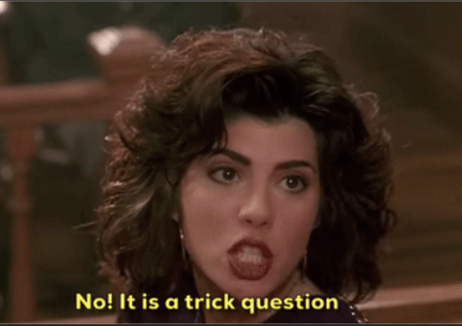

#### NOTE: Formula above is based on Farenheit. Accessed temperatures are in Kelvin. 

####  Must convert for remaining code to work.

In [13]:
# What are 75 / 90 in Kelvin?
min_temp_K = ((75 + 459.67)*5)/9
max_temp_K = ((90 + 459.67)*5)/9

print(min_temp_K)
print(max_temp_K)

297.03888888888895
305.37222222222226


In [14]:
# Update the filter to the dataset for Kelvin
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp_K) & 
                                       (city_data_df["Max Temp"] >= min_temp_K)]
preferred_cities_df.head(3)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Lujan,AR,1/22/2022 12:30,-34.5703,-59.1050,298.05,88,99,6.35
6,6,Rikitea,PF,1/22/2022 12:27,-23.1203,-134.9692,298.77,68,87,4.79
9,9,Walvis Bay,NaN,1/22/2022 12:32,-22.9575,14.5053,299.68,61,40,4.12


Consider the following guidance:
1. Depending on the time of year and the seasons, you might have to adjust the minimum and maximum temperature to get enough cities.
2. It is a good idea to keep the number of cities to fewer than 200 to make it easier to plot the markers on the heatmap.
3. If you have some rows with null values, you'll need to drop them using the dropna() method at the end of your filtering statement when you are creating the new DataFrame.

In [15]:
# Determine if there are any null values; if so - drop.na()
preferred_cities_df.count()

City_ID       177
City          177
Country       173
Date          177
Lat           177
Lng           177
Max Temp      177
Humidity      177
Cloudiness    177
Wind Speed    177
dtype: int64

In [16]:
preferred_cities_df.dropna().count()

City_ID       173
City          173
Country       173
Date          173
Lat           173
Lng           173
Max Temp      173
Humidity      173
Cloudiness    173
Wind Speed    173
dtype: int64

## Map Vacation Criteria

In [17]:
# Get travel destinations ... create a df to store hotel names + additional information
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

# Note "Hotel Name" is currently empty.

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Lujan,AR,298.05,-34.5703,-59.1050,
6,Rikitea,PF,298.77,-23.1203,-134.9692,
9,Walvis Bay,NaN,299.68,-22.9575,14.5053,
12,Sorong,ID,300.11,-0.8833,131.2500,
13,Adrar,MR,297.69,20.5022,-10.0711,
17,Port Alfred,ZA,300.06,-33.5906,26.8910,
18,Atuona,PF,298.75,-9.8000,-139.0333,
19,Boyolangu,ID,298.07,-8.1181,111.8935,
20,Vaini,TO,299.24,-21.2000,-175.2000,
21,Georgetown,MY,303.12,5.4112,100.3354,


#### Hotels: [Nearby Search](https://developers.google.com/maps/documentation/places/web-service/search#PlaceSearchRequests%0D%0A) and [Place Types](https://developers.google.com/maps/documentation/places/web-service/supported_types) with [Python Requests Library](https://requests.kennethreitz.org/en/master/)

In [18]:
# Use Google Places Nearby Search to retrieve hotel information
# Set search parameters (not using rankby=distance)
# Retrieve in JSON format (https://maps.googleapis.com/maps/api/place/nearbysearch/json)
# Provide arguments

# Set parameters to search for a hotel.
params = {
    "radius": 5000,              #5K meter radius is ~31 miles
    "type": "lodging",
    "key": g_key
}

In [19]:
# RUN IF NEEDED
# Dependencies and Setup
#import requests
#import gmaps

# Import API key
#from config import g_key

In [20]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
-----------------------------
Data Retrieval Complete      
-----------------------------


In [21]:
hotel_df.head(3)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Lujan,AR,298.05,-34.5703,-59.1050,Hotel Biarritz
6,Rikitea,PF,298.77,-23.1203,-134.9692,People ThankYou
9,Walvis Bay,NaN,299.68,-22.9575,14.5053,Oyster Box Guesthouse


In [22]:
hotel_df.count()

City          177
Country       173
Max Temp      177
Lat           177
Lng           177
Hotel Name    177
dtype: int64

### NOTE: PROVIDED CODE FOCUSED ON hotel_df, but this is not preferred by customer (ie, preferred_cities_df) ...

#### Add Pop-Up Markers with Hotel Info to Heat Map

In [23]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=2)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=2)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

#### Create an information box template and store data

In [25]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [26]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

#### Produce the Final Product

In [27]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))